## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.


### Import Packages Required for this Analysis

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

### Read in the data

In [36]:
income_statement = pd.read_excel(r"C:\Users\hunte\Documents\Analyst Workshop\Pandas_For_Data_Analysis\13. Building Financial Reports\Income_Statement.xlsx")
balance_sheet = pd.read_excel(r"C:\Users\hunte\Documents\Analyst Workshop\Pandas_For_Data_Analysis\13. Building Financial Reports\Balance_Sheet.xlsx")

### Verify Successful Import






#### Income Statement

In [37]:
income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                60 non-null     int64 
 1   Year                      60 non-null     int64 
 2   comp_type                 60 non-null     object
 3   company                   60 non-null     object
 4   Cost Of Goods Sold        60 non-null     int64 
 5   Gross Profit              60 non-null     int64 
 6   Operating Income          60 non-null     int64 
 7   Total Operating Expenses  60 non-null     int64 
 8   Total Revenue             60 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.3+ KB


In [38]:
income_statement.head()

Unnamed: 0  Year comp_type company  Cost Of Goods Sold  Gross Profit  \
0           0  2019      tech    AAPL        161782000000   98392000000   
1           1  2020      tech    AAPL        169559000000  104956000000   
2           2  2021      tech    AAPL        212981000000  152836000000   
3           3  2022      tech    AAPL        223546000000  170782000000   
4           4  2019      tech    MSFT         42910000000   82933000000   

   Operating Income  Total Operating Expenses  Total Revenue  
0       63930000000              196244000000   260174000000  
1       66288000000              208227000000   274515000000  
2      108949000000              256868000000   365817000000  
3      119437000000              274891000000   394328000000  
4       42959000000               82884000000   125843000000

#### Balance Sheet

In [39]:
balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [40]:
balance_sheet.head()

Unnamed: 0  Year comp_type company  Accounts Payable         Cash  \
0           0  2019      tech    AAPL       46236000000  48844000000   
1           1  2020      tech    AAPL       42296000000  38016000000   
2           2  2021      tech    AAPL       54763000000  34940000000   
3           3  2022      tech    AAPL       64115000000  23646000000   
4           4  2019      tech    MSFT        9382000000  11356000000   

      Inventory  Property Plant Equipment  Short Term Investments  \
0  4.106000e+09               37378000000            5.171300e+10   
1  4.061000e+09               45336000000            5.292700e+10   
2  6.580000e+09               49527000000            2.769900e+10   
3  4.946000e+09               84234000000            2.465800e+10   
4  2.063000e+09               43856000000            1.224760e+11   

   Total Assets  Total Current Assets  Total Current Liabilities  \
0  338516000000          162819000000               105718000000   
1  323888000000          143713000000               105392000000   
2  351002000000          134836000000               125481000000   
3  352755000000          135405000000               153982000000   
4  286556000000          175552000000                69420000000   

     Total Liab  Total Stockholder Equity  
0  248028000000               90488000000  
1  258549000000               65339000000  
2  287912000000               63090000000  
3  302083000000               50672000000  
4  184226000000              102330000000

### Merge The Dataframes

In [41]:
financial_statements = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

#### Verify Successful Merge

In [42]:
financial_statements.head()

Unnamed: 0_x  Year comp_type company  Cost Of Goods Sold  Gross Profit  \
0             0  2019      tech    AAPL        161782000000   98392000000   
1             1  2020      tech    AAPL        169559000000  104956000000   
2             2  2021      tech    AAPL        212981000000  152836000000   
3             3  2022      tech    AAPL        223546000000  170782000000   
4             4  2019      tech    MSFT         42910000000   82933000000   

   Operating Income  Total Operating Expenses  Total Revenue  Unnamed: 0_y  \
0       63930000000              196244000000   260174000000             0   
1       66288000000              208227000000   274515000000             1   
2      108949000000              256868000000   365817000000             2   
3      119437000000              274891000000   394328000000             3   
4       42959000000               82884000000   125843000000             4   

   Accounts Payable         Cash     Inventory  Property Plant Equipment  \
0       46236000000  48844000000  4.106000e+09               37378000000   
1       42296000000  38016000000  4.061000e+09               45336000000   
2       54763000000  34940000000  6.580000e+09               49527000000   
3       64115000000  23646000000  4.946000e+09               84234000000   
4        9382000000  11356000000  2.063000e+09               43856000000   

   Short Term Investments  Total Assets  Total Current Assets  \
0            5.171300e+10  338516000000          162819000000   
1            5.292700e+10  323888000000          143713000000   
2            2.769900e+10  351002000000          134836000000   
3            2.465800e+10  352755000000          135405000000   
4            1.224760e+11  286556000000          175552000000   

   Total Current Liabilities    Total Liab  Total Stockholder Equity  
0               105718000000  248028000000               90488000000  
1               105392000000  258549000000               65339000000  
2               125481000000  287912000000               63090000000  
3               153982000000  302083000000               50672000000  
4                69420000000  184226000000              102330000000

### Computing Ratios

#### Debt to Equity Ratio

In [43]:
financial_statements['Debt To Equity'] = financial_statements['Total Liab'] / financial_statements['Total Stockholder Equity']

#### Gross Margin Ration

In [44]:
financial_statements['Gross Margin'] = (financial_statements['Total Revenue'] - financial_statements['Cost Of Goods Sold']) / financial_statements['Total Revenue']

#### Verify

In [46]:
financial_statements.head()

Unnamed: 0_x  Year comp_type company  Cost Of Goods Sold  Gross Profit  \
0             0  2019      tech    AAPL        161782000000   98392000000   
1             1  2020      tech    AAPL        169559000000  104956000000   
2             2  2021      tech    AAPL        212981000000  152836000000   
3             3  2022      tech    AAPL        223546000000  170782000000   
4             4  2019      tech    MSFT         42910000000   82933000000   

   Operating Income  Total Operating Expenses  Total Revenue  Unnamed: 0_y  \
0       63930000000              196244000000   260174000000             0   
1       66288000000              208227000000   274515000000             1   
2      108949000000              256868000000   365817000000             2   
3      119437000000              274891000000   394328000000             3   
4       42959000000               82884000000   125843000000             4   

   ...     Inventory  Property Plant Equipment  Short Term Investments  \
0  ...  4.106000e+09               37378000000            5.171300e+10   
1  ...  4.061000e+09               45336000000            5.292700e+10   
2  ...  6.580000e+09               49527000000            2.769900e+10   
3  ...  4.946000e+09               84234000000            2.465800e+10   
4  ...  2.063000e+09               43856000000            1.224760e+11   

   Total Assets  Total Current Assets  Total Current Liabilities  \
0  338516000000          162819000000               105718000000   
1  323888000000          143713000000               105392000000   
2  351002000000          134836000000               125481000000   
3  352755000000          135405000000               153982000000   
4  286556000000          175552000000                69420000000   

     Total Liab  Total Stockholder Equity  Debt To Equity  Gross Margin  
0  248028000000               90488000000        2.741004      0.378178  
1  258549000000               65339000000        3.957039      0.382332  
2  287912000000               63090000000        4.563512      0.417794  
3  302083000000               50672000000        5.961537      0.433096  
4  184226000000              102330000000        1.800313      0.659020  

[5 rows x 22 columns]

### Grouping Ratios Over Company Type

#### Gross Margin (Profitability Ratio)

In [48]:
grouped_gm = pd.pivot_table(financial_statements, index = "comp_type", values = "Gross Margin")

In [49]:
grouped_gm

Gross Margin
comp_type              
fmcg           0.514396
real_est       0.534848
tech           0.572062

In [ ]:
lowest_profitability = "fmcg"

#### Debt to Equity (Leverage Ratio)

In [51]:
grouped_de = pd.pivot_table(financial_statements, index = "comp_type", values = "Debt To Equity")

In [52]:
grouped_de

Debt To Equity
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448

In [ ]:
highest_leverage = "real_est"

### Plotting Relationship between leverage and profitability in real estate companies

In [55]:
real_est = financial_statements.loc[financial_statements["comp_type"] == "real_est"]

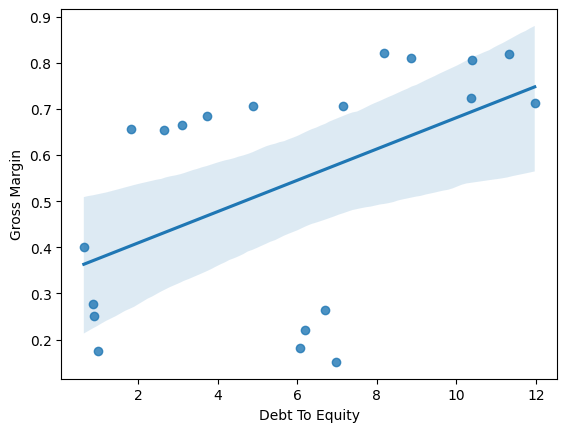

In [57]:
plot = sns.regplot(data=real_est, x="Debt To Equity", y="Gross Margin")

In [ ]:
relationship = "Positive"